## Progetto Finale Data Analysis - Education

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

Il primo lavoro che ho fatto è stato 'sistemare' (con Excel) le colonne con all'interno delle date (class_date e subscription_date) mettendo il formato yyyy-mm-dd, in modo che Pandas riconosca i valori e possa mettermeli in ordine se necessario

In [2]:
df = pd.read_csv("C:\\Users\\Tommy_Portatile\\Desktop\\Start2Impact\\ZZFinale\\Education_data pulito.csv", sep = ';')

In [3]:
df.head(15)

class_date  user_uuid       category  trainer_id language         level  \
0   2023-10-05        195     statistics         110       en         basic   
1   2022-12-02         63     statistics         114       en         basic   
2   2023-07-22         32   data_science         118       it      advanced   
3   2021-05-20         67     statistics         114       fr         basic   
4   2023-08-18         97   data_science         109       it         basic   
5   2021-06-16         69     statistics         113       en      advanced   
6   2023-03-15         85     full_stack         122       fr      advanced   
7   2022-05-05         48     statistics         120       it         basic   
8   2023-07-13         43     statistics         106       en      advanced   
9   2023-01-19         54             UX         114       en         basic   
10  2023-02-01        133     full_stack         114       en         basic   
11  2023-01-28        108  data_analysis         107       it      advanced   
12  2022-07-12         89             UX         106       it      advanced   
13  2022-06-09        233             UX         105       en  intermediate   
14  2022-05-28         40     statistics         114       it  intermediate   

    challenge_id country subscription_date platform  class_id  stars  
0              2      uk        2022-12-09       tv      6171      1  
1              0      uk        2020-02-27   mobile      6159      3  
2              3      it        2022-03-07       pc      3363      3  
3              1      fr        2020-10-01       tv      6175      2  
4              1      it        2021-05-21   mobile      3179      2  
5              0      uk        2020-08-23       tv      6314      4  
6              3      fr        2020-03-28       pc      6366      2  
7              3      it        2020-10-21   mobile      6151      4  
8              0      uk        2022-09-14   mobile      6385      2  
9              0      uk        2022-05-02       tv       119      4  
10             3      uk        2022-07-19   mobile      6182      4  
11             3      it        2021-12-08       tv       239      3  
12             3      it        2020-01-02       pc      1398      1  
13             0      uk        2021-06-11   mobile      1299      4  
14             0      it        2021-09-08       pc      6261      1

## Svolgimento

Come prima cosa nello svolgimento dell'analisi voglio vedere la distribuzione delle stelle:

In [4]:
df['stars'].value_counts()  # qui conto il numero di osservazioni e il voto in stelle.

stars
3    225
2    207
5    203
4    185
1    179
Name: count, dtype: int64

Ora prendo solo le osservazioni che hanno ottenuto il massimo del punteggio (ovvero 5 stelle)

In [5]:
best_rank = df[df.stars == 5]

In [6]:
best_rank

class_date  user_uuid       category  trainer_id language         level  \
22   2022-12-12         78     statistics         111       en         basic   
24   2023-06-28         68  data_analysis         106       en      advanced   
29   2022-11-17        169  data_analysis         117       it         basic   
30   2023-12-18          6     statistics         119       fr         basic   
31   2023-04-13         28  data_analysis         111       it      advanced   
..          ...        ...            ...         ...      ...           ...   
973  2023-03-16         64     statistics         101       en         basic   
985  2022-07-18         71  data_analysis         116       it      advanced   
992  2023-03-03        213            SEO         101       it  intermediate   
996  2022-07-28        203             UX         117       it  intermediate   
998  2023-01-18        123     statistics         100       fr  intermediate   

     challenge_id country subscription_date platform  class_id  stars  
22              2      uk        2021-02-24       pc       614      5  
24              1      uk        2020-12-14       pc      2383      5  
29              3      it        2021-06-16       tv      2166      5  
30              2      fr        2020-09-14       tv      6171      5  
31              3      it        2022-06-01       tv      2379      5  
..            ...     ...               ...      ...       ...    ...  
973             1      uk        2022-11-04       pc      6194      5  
985             0      it        2021-05-10       tv      2344      5  
992             2      it        2021-09-24       tv       621      5  
996             3      it        2021-03-28       pc      1290      5  
998             2      fr        2021-09-19       tv      6275      5  

[203 rows x 12 columns]

In [7]:
best_rank['category'].value_counts() # qui posso vedere come sono distribuite le osservazioni nei vari gruppi.

category
statistics       71
UX               34
data_analysis    29
data_science     20
full_stack       19
SEO              18
copywriting      12
Name: count, dtype: int64

Ora voglio raggruppare le osservazioni, per categoria e per livello, in modo da vedere più nel dettaglio la distribuzione, decido anche di ordinarle:

In [8]:
best_rank.groupby(['category', 'level']).count().sort_values(by = ['category', 'stars'], ascending = False)

class_date  user_uuid  trainer_id  language  \
category      level                                                       
statistics    advanced              29         29          29        29   
              basic                 24         24          24        24   
              intermediate          18         18          18        18   
full_stack    advanced               8          8           8         8   
              basic                  8          8           8         8   
              intermediate           3          3           3         3   
data_science  advanced               7          7           7         7   
              intermediate           7          7           7         7   
              basic                  6          6           6         6   
data_analysis advanced              12         12          12        12   
              basic                 12         12          12        12   
              intermediate           5          5           5         5   
copywriting   advanced               5          5           5         5   
              basic                  4          4           4         4   
              intermediate           3          3           3         3   
UX            advanced              15         15          15        15   
              basic                 11         11          11        11   
              intermediate           8          8           8         8   
SEO           basic                  7          7           7         7   
              advanced               6          6           6         6   
              intermediate           5          5           5         5   

                            challenge_id  country  subscription_date  \
category      level                                                    
statistics    advanced                29       29                 29   
              basic                   24       24                 24   
              intermediate            18       18                 18   
full_stack    advanced                 8        8                  8   
              basic                    8        8                  8   
              intermediate             3        3                  3   
data_science  advanced                 7        7                  7   
              intermediate             7        7                  7   
              basic                    6        6                  6   
data_analysis advanced                12       12                 12   
              basic                   12       12                 12   
              intermediate             5        5                  5   
copywriting   advanced                 5        5                  5   
              basic                    4        4                  4   
              intermediate             3        3                  3   
UX            advanced                15       15                 15   
              basic                   11       11                 11   
              intermediate             8        8                  8   
SEO           basic                    7        7                  7   
              advanced                 6        6                  6   
              intermediate             5        5                  5   

                            platform  class_id  stars  
category      level                                    
statistics    advanced            29        29     29  
              basic               24        24     24  
              intermediate        18        18     18  
full_stack    advanced             8         8      8  
              basic                8         8      8  
              intermediate         3         3      3  
data_science  advanced             7         7      7  
              intermediate         7         7      7  
              basic                6         6      6  
data_analysis advanced       

Qui posso vedere le distribuzioni nelle varie categorie e livelli: posso vedere che nelle 71 ossservazioni della categoria 'statistics' la maggior parte sono di livello avanzato (29), seguono base (24) e intermedio (18)
Posso anche vedere tutte le altre categorie e le varie distribuzioni nei vari livelli

Posso anche utilizzare lo stesso comando ma su tutto il Dataset e vedere se cambia la distribuzione delle ossservazioni:

In [9]:
df['category'].value_counts()

category
statistics       328
UX               159
data_analysis    146
data_science     128
full_stack        97
SEO               77
copywriting       64
Name: count, dtype: int64

In [10]:
df.groupby(['category', 'level']).count().sort_values(by = ['category', 'stars'], ascending = False)

class_date  user_uuid  trainer_id  language  \
category      level                                                       
statistics    advanced             146        146         146       146   
              basic                110        110         110       110   
              intermediate          72         72          72        72   
full_stack    advanced              47         47          47        47   
              basic                 36         36          36        36   
              intermediate          14         14          14        14   
data_science  advanced              59         59          59        59   
              basic                 45         45          45        45   
              intermediate          24         24          24        24   
data_analysis advanced              64         64          64        64   
              basic                 53         53          53        53   
              intermediate          29         29          29        29   
copywriting   advanced              30         30          30        30   
              basic                 20         20          20        20   
              intermediate          14         14          14        14   
UX            advanced              66         66          66        66   
              basic                 58         58          58        58   
              intermediate          35         35          35        35   
SEO           advanced              32         32          32        32   
              basic                 29         29          29        29   
              intermediate          16         16          16        16   

                            challenge_id  country  subscription_date  \
category      level                                                    
statistics    advanced               146      146                146   
              basic                  110      110                110   
              intermediate            72       72                 72   
full_stack    advanced                47       47                 47   
              basic                   36       36                 36   
              intermediate            14       14                 14   
data_science  advanced                59       59                 59   
              basic                   45       45                 45   
              intermediate            24       24                 24   
data_analysis advanced                64       64                 64   
              basic                   53       53                 53   
              intermediate            29       29                 29   
copywriting   advanced                30       30                 30   
              basic                   20       20                 20   
              intermediate            14       14                 14   
UX            advanced                66       66                 66   
              basic                   58       58                 58   
              intermediate            35       35                 35   
SEO           advanced                32       32                 32   
              basic                   29       29                 29   
              intermediate            16       16                 16   

                            platform  class_id  stars  
category      level                                    
statistics    advanced           146       146    146  
              basic              110       110    110  
              intermediate        72        72     72  
full_stack    advanced            47        47     47  
              basic               36        36     36  
              intermediate        14        14     14  
data_science  advanced            59        59     59  
              basic               45        45     45  
              intermediate        24        24     24  
data_analysis advanced       

posso vedere che le due distribuzioni sono proporzionate

In [11]:
best_rank['trainer_id'].value_counts() # conteggio insegnanti nella porzione di dataset con 5 stelle

trainer_id
101    14
119    12
122    11
103    11
118    10
114    10
106    10
111    10
108    10
116     9
109     9
115     9
104     9
107     8
112     8
113     8
120     8
110     7
117     7
102     7
105     6
100     6
121     4
Name: count, dtype: int64

## Trend Temporali

Altro obiettivo dell'analisi è andare a vedere se ci sono di trend temporali nella scelta dei corsi da parte degli studenti.
Provo ad utilizzare la colonna 'class date' e un grafico 'a bolle' per vedere se posso trovare dei trend

In [12]:
# qui trasformo la colonna 'class_date' e suddivido il dataset per anno

df['class_date'] = pd.to_datetime(df['class_date'])
df_2021 = df [df['class_date'].dt.year == 2021]
df_2022 = df [df['class_date'].dt.year == 2022]
df_2023 = df [df['class_date'].dt.year == 2023] 


In [13]:
# qui conto le osservazioni raggruppandole per anno
df.groupby(df['class_date'].dt.year,).count()

class_date  user_uuid  category  trainer_id  language  level  \
class_date                                                                 
2021               125        125       125         125       125    125   
2022               292        292       292         292       292    292   
2023               582        582       582         582       582    582   

            challenge_id  country  subscription_date  platform  class_id  \
class_date                                                                 
2021                 125      125                125       125       125   
2022                 292      292                292       292       292   
2023                 582      582                582       582       582   

            stars  
class_date         
2021          125  
2022          292  
2023          582

Posso notare che le osservazioni sono in aumento e raddoppiano (circa) anno per anno

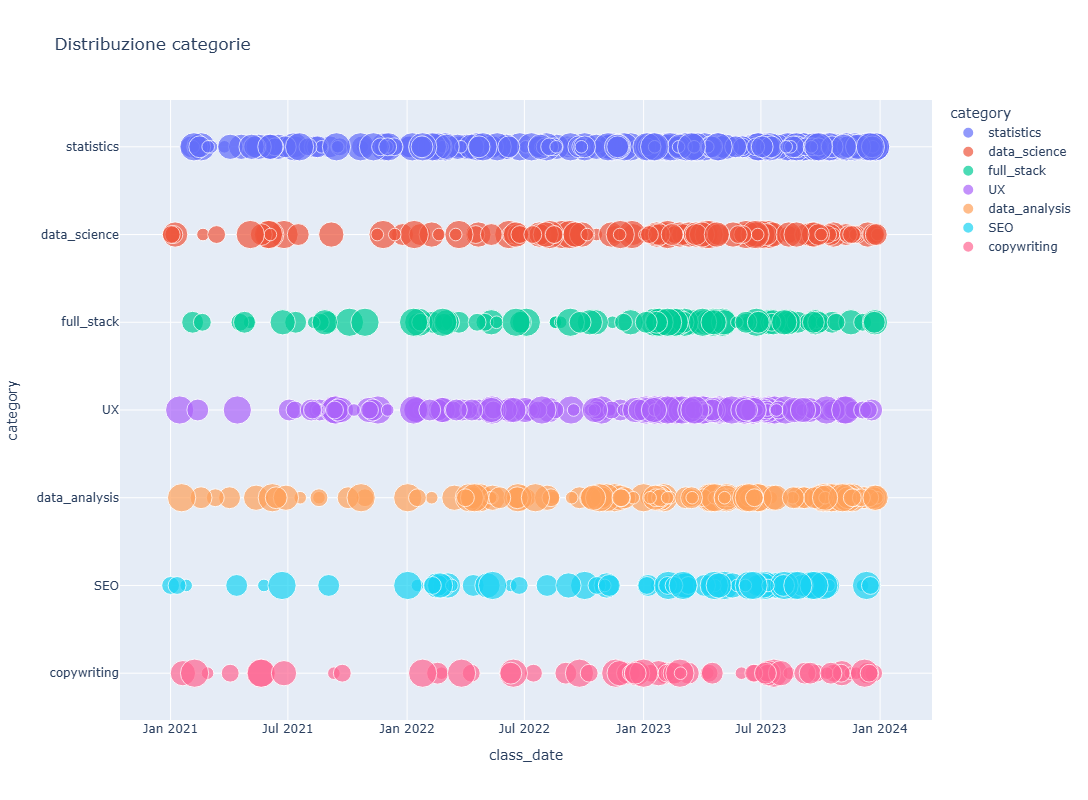

In [14]:
fig = px.scatter(
    df,
    x = 'class_date',
    y = 'category',
    size = 'stars',
    color = 'category',
    title = 'Distribuzione categorie',
    height = 800,
    width = 1100
)

fig.show()

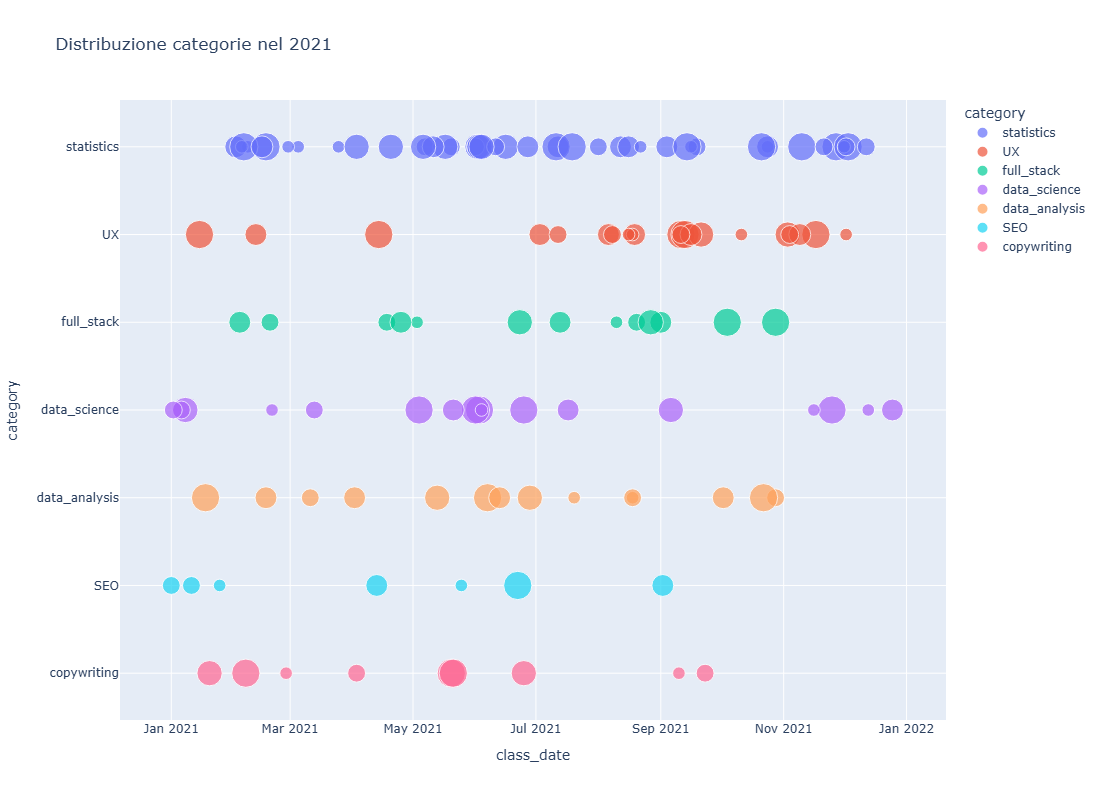

In [15]:
fig = px.scatter(
    df_2021,
    x = 'class_date',
    y = 'category',
    size = 'stars',
    color = 'category',
    title = 'Distribuzione categorie nel 2021',
    height = 800,
    width = 1100
)

fig.show()

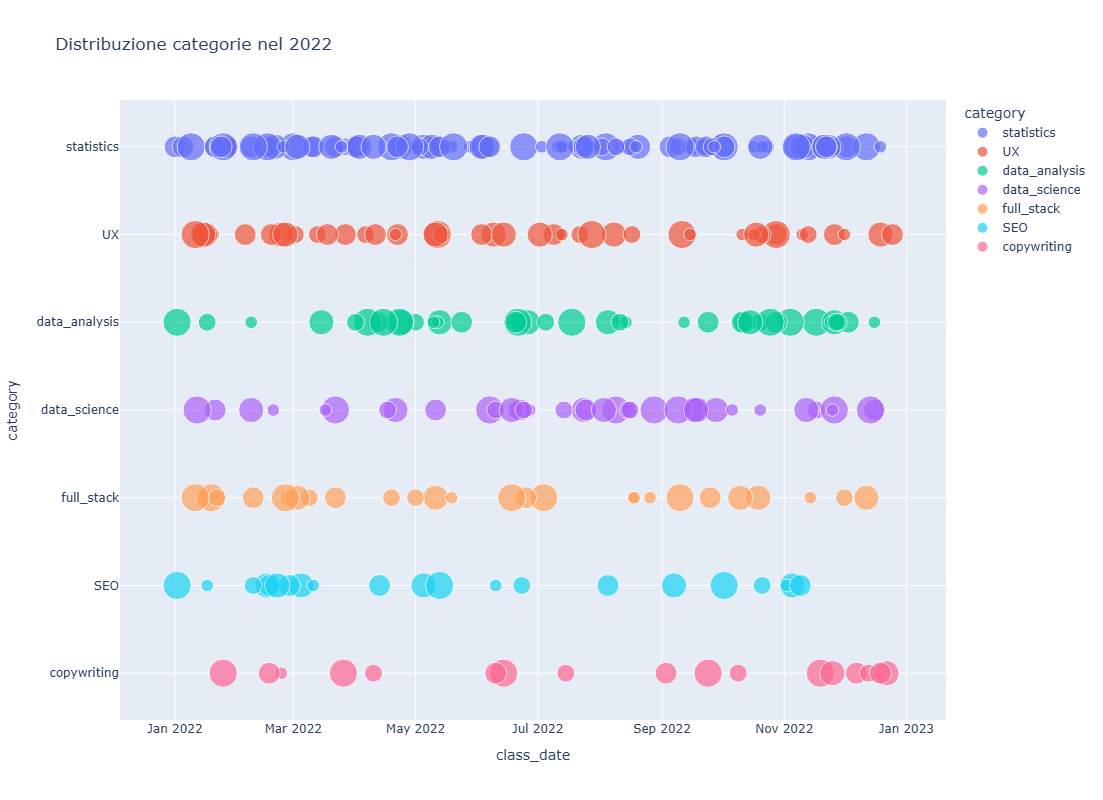

In [16]:
fig = px.scatter(
    df_2022,
    x = 'class_date',
    y = 'category',
    size = 'stars',
    color = 'category',
    title = 'Distribuzione categorie nel 2022',
    height = 800,
    width = 1100
)

fig.show()

Divisione categorie e device utilizzati

In [17]:
df.groupby(['category','platform']).count().sort_values (by = [ 'category','platform', 'stars'], ascending = False) # distribuzione categoria e device

class_date  user_uuid  trainer_id  language  level  \
category      platform                                                       
statistics    tv               136        136         136       136    136   
              pc               106        106         106       106    106   
              mobile            86         86          86        86     86   
full_stack    tv                41         41          41        41     41   
              pc                32         32          32        32     32   
              mobile            24         24          24        24     24   
data_science  tv                51         51          51        51     51   
              pc                44         44          44        44     44   
              mobile            33         33          33        33     33   
data_analysis tv                66         66          66        66     66   
              pc                51         51          51        51     51   
              mobile            29         29          29        29     29   
copywriting   tv                32         32          32        32     32   
              pc                25         25          25        25     25   
              mobile             7          7           7         7      7   
UX            tv                56         56          56        56     56   
              pc                74         74          74        74     74   
              mobile            29         29          29        29     29   
SEO           tv                38         38          38        38     38   
              pc                19         19          19        19     19   
              mobile            20         20          20        20     20   

                        challenge_id  country  subscription_date  class_id  \
category      platform                                                       
statistics    tv                 136      136                136       136   
              pc                 106      106                106       106   
              mobile              86       86                 86        86   
full_stack    tv                  41       41                 41        41   
              pc                  32       32                 32        32   
              mobile              24       24                 24        24   
data_science  tv                  51       51                 51        51   
              pc                  44       44                 44        44   
              mobile              33       33                 33        33   
data_analysis tv                  66       66                 66        66   
              pc                  51       51                 51        51   
              mobile              29       29                 29        29   
copywriting   tv                  32       32                 32        32   
              pc                  25       25                 25        25   
              mobile               7        7                  7         7   
UX            tv                  56       56                 56        56   
              pc                  74       74                 74        74   
              mobile              29       29                 29        29   
SEO           tv                  38       38                 38        38   
              pc                  19       19                 19        19   
              mobile              20       20                 20        20   

                        stars  
category      platform         
statistics    tv          136  
              pc          106  
              mobile       86  
full_stack    tv           41  
              pc           32  
              mobile       24  
data_science  tv           51  
              pc           44  
              mobile       33  
data_analysis tv           66  
              pc           51  
              mobi